# Bat echolocation EDA

# Loading and EDA Haberkorn bat echolocation library

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data for truthed_library
tr_lib = pd.read_csv('truthed_library.csv')

In [3]:
tr_lib.head()

,IN FILE,AUTO ID*,PULSES,MATCH RATIO,MARGIN,Fc,Sc,Dur,Fmax,Fmin,Fk,Tk,Tc,S1,BWDth,PkDur,COMP ID,Result
0,NoID_20200716_212136.wav,ANTPAL,97.0,0.258,0.088132,32.032,84.83,3.601,43.750,31.157,35.004,2.090,3.370,326.50,12.593,35.545682,NoID,False
1,ANTPAL_20190607_204646.wav,ANTPAL,16.0,0.875,0.498225,28.955,61.99,6.088,48.466,27.932,30.731,4.213,5.505,208.94,20.534,21.222076,ANTPAL,True
2,ANTPAL_20200716_211653.wav,ANTPAL,14.0,0.714,0.512325,29.955,68.58,2.948,39.362,29.800,31.430,1.990,2.898,297.09,9.562,30.800543,ANTPAL,True
3,ANTPAL_20190626_205037.wav,ANTPAL,9.0,0.444,0.224854,32.315,92.00,4.292,54.628,31.916,35.201,2.918,4.116,547.76,22.712,27.912395,ANTPAL,True
4,EPTFUS_20200301_191434.wav,EPTFUS,161.0,0.398,0.114901,35.502,31.02,6.288,46.429,34.205,37.141,3.196,5.315,332.20,12.224,33.699109,EPTFUS,True


In [4]:
tr_lib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5849 entries, 0 to 5848
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IN FILE      5849 non-null   object 
 1   AUTO ID*     5849 non-null   object 
 2   PULSES       5849 non-null   float64
 3   MATCH RATIO  5849 non-null   float64
 4   MARGIN       5849 non-null   float64
 5   Fc           5849 non-null   float64
 6   Sc           5849 non-null   float64
 7   Dur          5849 non-null   float64
 8   Fmax         5849 non-null   float64
 9   Fmin         5849 non-null   float64
 10  Fk           5849 non-null   float64
 11  Tk           5849 non-null   float64
 12  Tc           5849 non-null   float64
 13  S1           5849 non-null   float64
 14  BWDth        5849 non-null   float64
 15  PkDur        5849 non-null   float64
 16  COMP ID      5849 non-null   object 
 17  Result       5849 non-null   bool   
dtypes: bool(1), float64(14), object(3)
memory usage:

In [5]:
#drop column with name of file
tr_lib = tr_lib.drop('IN FILE', 1)
tr_lib.head()

,AUTO ID*,PULSES,MATCH RATIO,MARGIN,Fc,Sc,Dur,Fmax,Fmin,Fk,Tk,Tc,S1,BWDth,PkDur,COMP ID,Result
0,ANTPAL,97.0,0.258,0.088132,32.032,84.83,3.601,43.750,31.157,35.004,2.090,3.370,326.50,12.593,35.545682,NoID,False
1,ANTPAL,16.0,0.875,0.498225,28.955,61.99,6.088,48.466,27.932,30.731,4.213,5.505,208.94,20.534,21.222076,ANTPAL,True
2,ANTPAL,14.0,0.714,0.512325,29.955,68.58,2.948,39.362,29.800,31.430,1.990,2.898,297.09,9.562,30.800543,ANTPAL,True
3,ANTPAL,9.0,0.444,0.224854,32.315,92.00,4.292,54.628,31.916,35.201,2.918,4.116,547.76,22.712,27.912395,ANTPAL,True
4,EPTFUS,161.0,0.398,0.114901,35.502,31.02,6.288,46.429,34.205,37.141,3.196,5.315,332.20,12.224,33.699109,EPTFUS,True


In [6]:
#view species in 'AUTO ID*' column
tr_lib['AUTO ID*'].unique()

array(['ANTPAL', 'EPTFUS', 'EUMPER', 'EUMUND', 'LASBLO', 'LASCIN',
       'LASNOC', 'LASXAN', 'MYOCAL', 'MYOCIL', 'MYOEVO', 'MYOOCC',
       'MYOTHY', 'MYOVEL', 'MYOVOL', 'MYOYUM', 'NYCFEM', 'NYCMAC', 'NoID',
       'PARHES', 'TADBRA'], dtype=object)

In [7]:
tr_lib['AUTO ID*'].value_counts()

TADBRA    1893
NoID      1615
MYOYUM     739
PARHES     543
LASCIN     288
LASNOC     263
LASXAN     128
EPTFUS     122
MYOCAL      82
LASBLO      63
EUMUND      34
EUMPER      25
NYCFEM      12
MYOVOL       9
MYOTHY       7
MYOOCC       6
NYCMAC       6
MYOCIL       5
ANTPAL       4
MYOVEL       3
MYOEVO       2
Name: AUTO ID*, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

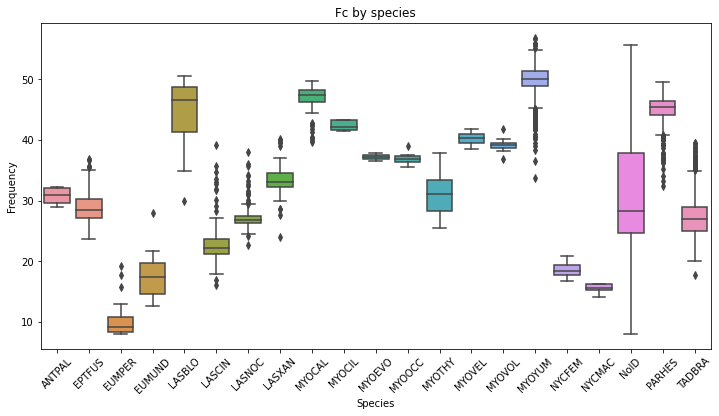

In [19]:
#view 'Fc' by species from the tr_lib dataframe
plt.subplots(figsize=(12,6))
sns.boxplot(tr_lib['AUTO ID*'], tr_lib['Fc'])
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Fc by species')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

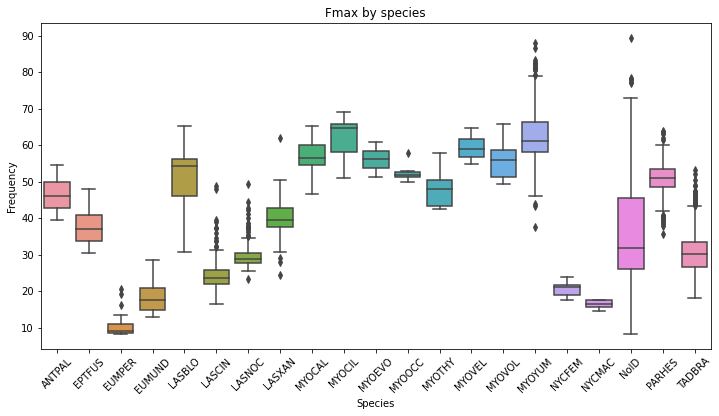

In [9]:
#view 'Fmax' by species from the tr_lib dataframe
plt.subplots(figsize=(12,6))
sns.boxplot(tr_lib['AUTO ID*'], tr_lib['Fmax'])
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Fmax by species')
plt.xticks(rotation=45)

In [41]:
#not sure why I can't get len() to work here
len(tr_lib['Result'] == 'False')

C:\Users\matta\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


0       False
1       False
2       False
3       False
4       False
        ...  
5844    False
5845    False
5846    False
5847    False
5848    False
Name: Result, Length: 5849, dtype: bool

In [11]:
#Percentage is not being calculated

for i in [float(x/10) for x in range(10)]:
    print(i)
    tempdf = tr_lib[tr_lib['MATCH RATIO'] > i]
    print(len(tempdf))
    print(sum(tempdf['Result'] == 'True') / len(tempdf) * 100)


0.0
4234
0.0
0.1
4217
0.0
0.2
4083
0.0
0.3
3639
0.0
0.4
2934
0.0
0.5
2170
0.0
0.6
1582
0.0
0.7
1077
0.0
0.8
608
0.0
0.9
299
0.0


In [12]:
#append not working?
a = []
b = []
for i in [float(x/10) for x in range(10)]:
    a = a.append(i)
    tempdf = tr_lib[tr_lib['MATCH RATIO'] > i]
    #print(len(tempdf))
    b = b.append(sum(tempdf['Result'] == 'True') / len(tempdf) * 100)

print(a)
print(b)

AttributeError: 'NoneType' object has no attribute 'append'

# Loading and EDA Mexico bat echolocation library

In [13]:
mx_lib = pd.read_csv('mexico_library.csv')

In [14]:
mx_lib.head()

,Spp,Fc,Sc,Dur,Fmax,Fmin,Fk,Tk,S1,BWDth,PkDur
0,Antpal,29.682143,0.775573,6.677325,51.913985,29.563483,35.484384,1.896671,-13.261031,22.350502,42.456971
1,Antpal,29.740707,2.098983,6.547622,62.085939,29.156824,37.478233,1.774427,-17.648151,32.929115,40.052484
2,Antpal,24.481353,1.180968,9.922187,49.176052,22.264376,31.074040,2.225043,-9.326721,26.911676,37.163160
3,Antpal,21.985593,2.133427,10.615288,47.155265,21.494085,29.988552,4.029702,-6.554913,25.661180,38.898737
4,Antpal,31.996077,0.014124,8.246364,61.109044,29.875009,40.815202,3.439792,-12.409399,31.234035,36.234372


In [15]:
mx_lib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585 entries, 0 to 1584
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Spp     1585 non-null   object 
 1   Fc      1585 non-null   float64
 2   Sc      1583 non-null   float64
 3   Dur     1585 non-null   float64
 4   Fmax    1585 non-null   float64
 5   Fmin    1585 non-null   float64
 6   Fk      1585 non-null   float64
 7   Tk      1585 non-null   float64
 8   S1      1583 non-null   float64
 9   BWDth   1585 non-null   float64
 10  PkDur   1585 non-null   float64
dtypes: float64(10), object(1)
memory usage: 136.3+ KB


In [17]:
#view unique species in species column
mx_lib['Spp'].unique()

array(['Antpal', 'Cortow', 'Eptfus', 'Eumund', 'Lasblo', 'Lasnoc',
       'Lasxan', 'Lepyer', 'Maccal', 'Myocal', 'Myothy', 'Myovel',
       'Myovol', 'Myoyum', 'Nycfem', 'Piphes', 'Tadbra'], dtype=object)

In [18]:
mx_lib['Spp'].value_counts()

Piphes    100
Tadbra    100
Cortow    100
Lasnoc    100
Eptfus    100
Myovol    100
Myovel    100
Myothy    100
Myoyum    100
Lasxan    100
Lasblo    100
Nycfem    100
Antpal    100
Myocal    100
Lepyer    100
Maccal     69
Eumund     16
Name: Spp, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

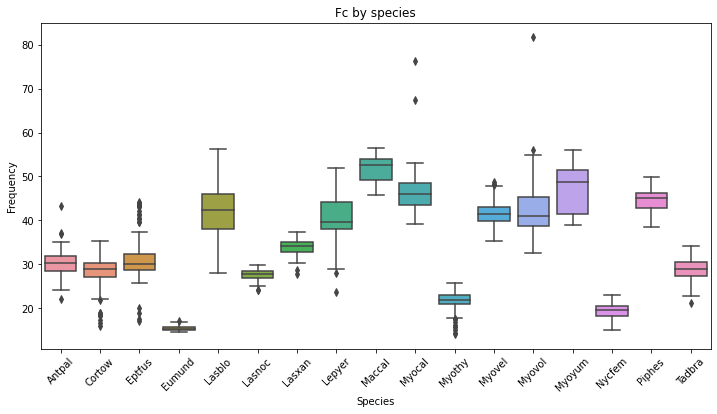

In [21]:
#Box plot of Fc by species for Mexican library

plt.subplots(figsize=(12,6))
sns.boxplot(mx_lib['Spp'], mx_lib['Fc'])
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Fc by species')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

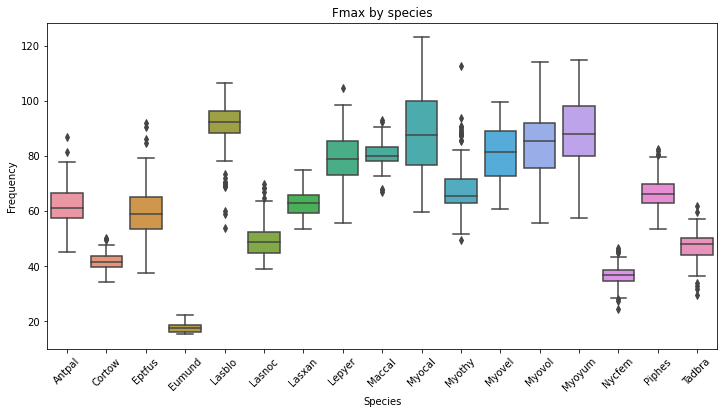

In [22]:
#boxplot of Fmax by species for Mexican library

plt.subplots(figsize=(12,6))
sns.boxplot(mx_lib['Spp'], mx_lib['Fmax'])
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Fmax by species')
plt.xticks(rotation=45)

# Appending tr_lib and mx_lib

In [23]:
tr_lib.columns

Index(['AUTO ID*', 'PULSES', 'MATCH RATIO', 'MARGIN', 'Fc', 'Sc', 'Dur',
       'Fmax', 'Fmin', 'Fk', 'Tk', 'Tc', 'S1', 'BWDth', 'PkDur', 'COMP ID',
       'Result'],
      dtype='object')

In [24]:
mx_lib.columns

Index(['Spp', 'Fc', 'Sc', 'Dur', 'Fmax', 'Fmin', 'Fk', 'Tk', 'S1', 'BWDth',
       'PkDur'],
      dtype='object')

In [25]:
#Selecting columns in common between two libraries 
tr_libdf = tr_lib[['AUTO ID*', 'Fc', 'Sc', 'Dur', 'Fmax', 'Fmin', 'Fk', 'Tk', 'S1', 'BWDth', 'PkDur']]

In [27]:
tr_libdf.columns

Index(['AUTO ID*', 'Fc', 'Sc', 'Dur', 'Fmax', 'Fmin', 'Fk', 'Tk', 'S1',
       'BWDth', 'PkDur'],
      dtype='object')

In [28]:
#Rename AUTO ID* column as Spp for species.  Place columns in same order for both dataframes.
tr_libdf.columns = ['Spp', 'Fc', 'Sc', 'Dur', 'Fmax', 'Fmin', 'Fk', 'Tk', 'S1', 'BWDth', 'PkDur']
print(tr_libdf.columns)

Index(['Spp', 'Fc', 'Sc', 'Dur', 'Fmax', 'Fmin', 'Fk', 'Tk', 'S1', 'BWDth',
       'PkDur'],
      dtype='object')


In [31]:
#Create column for name of library
tr_libdf['Library'] = 'Truthed'

<ipython-input-31-adbdb0e72dc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_libdf['Library'] = 'Truthed'


In [33]:
#Create column for name of library
mx_lib['Library'] = 'Mexico'

In [34]:
tr_libdf.head()

,Spp,Fc,Sc,Dur,Fmax,Fmin,Fk,Tk,S1,BWDth,PkDur,Library
0,ANTPAL,32.032,84.83,3.601,43.750,31.157,35.004,2.090,326.50,12.593,35.545682,Truthed
1,ANTPAL,28.955,61.99,6.088,48.466,27.932,30.731,4.213,208.94,20.534,21.222076,Truthed
2,ANTPAL,29.955,68.58,2.948,39.362,29.800,31.430,1.990,297.09,9.562,30.800543,Truthed
3,ANTPAL,32.315,92.00,4.292,54.628,31.916,35.201,2.918,547.76,22.712,27.912395,Truthed
4,EPTFUS,35.502,31.02,6.288,46.429,34.205,37.141,3.196,332.20,12.224,33.699109,Truthed


In [35]:
mx_lib.head()

,Spp,Fc,Sc,Dur,Fmax,Fmin,Fk,Tk,S1,BWDth,PkDur,Library
0,Antpal,29.682143,0.775573,6.677325,51.913985,29.563483,35.484384,1.896671,-13.261031,22.350502,42.456971,Mexico
1,Antpal,29.740707,2.098983,6.547622,62.085939,29.156824,37.478233,1.774427,-17.648151,32.929115,40.052484,Mexico
2,Antpal,24.481353,1.180968,9.922187,49.176052,22.264376,31.074040,2.225043,-9.326721,26.911676,37.163160,Mexico
3,Antpal,21.985593,2.133427,10.615288,47.155265,21.494085,29.988552,4.029702,-6.554913,25.661180,38.898737,Mexico
4,Antpal,31.996077,0.014124,8.246364,61.109044,29.875009,40.815202,3.439792,-12.409399,31.234035,36.234372,Mexico


In [40]:
#Determine if both dataframes have the same columns
tr_libdf.columns == mx_lib.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [42]:
#combining both dataframes into one
df = tr_libdf.append(mx_lib)
print(df.head())
print(df.tail())

      Spp      Fc     Sc    Dur    Fmax    Fmin      Fk     Tk      S1  \
0  ANTPAL  32.032  84.83  3.601  43.750  31.157  35.004  2.090  326.50   
1  ANTPAL  28.955  61.99  6.088  48.466  27.932  30.731  4.213  208.94   
2  ANTPAL  29.955  68.58  2.948  39.362  29.800  31.430  1.990  297.09   
3  ANTPAL  32.315  92.00  4.292  54.628  31.916  35.201  2.918  547.76   
4  EPTFUS  35.502  31.02  6.288  46.429  34.205  37.141  3.196  332.20   

    BWDth      PkDur  Library  
0  12.593  35.545682  Truthed  
1  20.534  21.222076  Truthed  
2   9.562  30.800543  Truthed  
3  22.712  27.912395  Truthed  
4  12.224  33.699109  Truthed  
         Spp         Fc        Sc        Dur       Fmax       Fmin         Fk  \
1580  Tadbra  32.271564  0.910047   7.894287  49.518156  28.325091  34.814838   
1581  Tadbra  31.108398  2.144716   7.370198  51.469041  28.772762  35.978255   
1582  Tadbra  33.426946  1.192079  10.466146  45.085376  29.451755  37.904823   
1583  Tadbra  30.836558  1.516720   6.7

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7434 entries, 0 to 1584
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Spp      7434 non-null   object 
 1   Fc       7434 non-null   float64
 2   Sc       7432 non-null   float64
 3   Dur      7434 non-null   float64
 4   Fmax     7434 non-null   float64
 5   Fmin     7434 non-null   float64
 6   Fk       7434 non-null   float64
 7   Tk       7434 non-null   float64
 8   S1       7432 non-null   float64
 9   BWDth    7434 non-null   float64
 10  PkDur    7434 non-null   float64
 11  Library  7434 non-null   object 
dtypes: float64(10), object(2)
memory usage: 755.0+ KB


In [44]:
df['Spp'].value_counts()

TADBRA    1893
NoID      1615
MYOYUM     739
PARHES     543
LASCIN     288
LASNOC     263
LASXAN     128
EPTFUS     122
Nycfem     100
Lepyer     100
Cortow     100
Myovol     100
Myoyum     100
Lasxan     100
Antpal     100
Lasblo     100
Myothy     100
Tadbra     100
Piphes     100
Myovel     100
Lasnoc     100
Eptfus     100
Myocal     100
MYOCAL      82
Maccal      69
LASBLO      63
EUMUND      34
EUMPER      25
Eumund      16
NYCFEM      12
MYOVOL       9
MYOTHY       7
MYOOCC       6
NYCMAC       6
MYOCIL       5
ANTPAL       4
MYOVEL       3
MYOEVO       2
Name: Spp, dtype: int64

In [47]:
#Make all species abreviations uppercase

df['Spp']  = df['Spp'].str.upper()

In [48]:
df['Spp'].value_counts()

TADBRA    1993
NOID      1615
MYOYUM     839
PARHES     543
LASNOC     363
LASCIN     288
LASXAN     228
EPTFUS     222
MYOCAL     182
LASBLO     163
NYCFEM     112
MYOVOL     109
MYOTHY     107
ANTPAL     104
MYOVEL     103
CORTOW     100
LEPYER     100
PIPHES     100
MACCAL      69
EUMUND      50
EUMPER      25
MYOOCC       6
NYCMAC       6
MYOCIL       5
MYOEVO       2
Name: Spp, dtype: int64

In [49]:
#Change PIPHES to updated scientific name PARHES
df['Spp'] = df['Spp'].replace('PIPHES', 'PARHES')

In [50]:
df['Spp'].value_counts()

TADBRA    1993
NOID      1615
MYOYUM     839
PARHES     643
LASNOC     363
LASCIN     288
LASXAN     228
EPTFUS     222
MYOCAL     182
LASBLO     163
NYCFEM     112
MYOVOL     109
MYOTHY     107
ANTPAL     104
MYOVEL     103
CORTOW     100
LEPYER     100
MACCAL      69
EUMUND      50
EUMPER      25
MYOOCC       6
NYCMAC       6
MYOCIL       5
MYOEVO       2
Name: Spp, dtype: int64

In [51]:
#Total number of species in df
len(df['Spp'].unique())

24

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

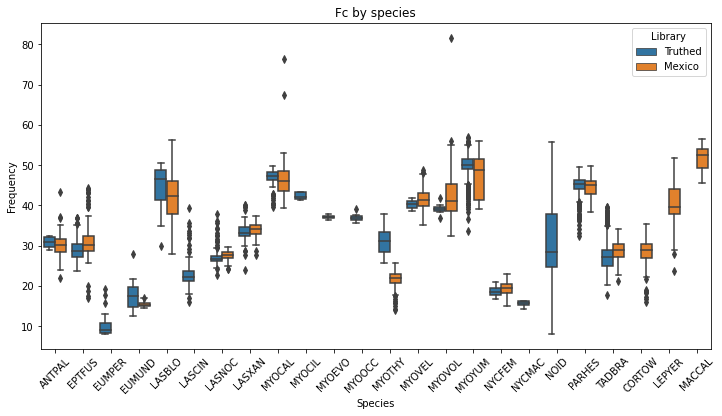

In [53]:
plt.subplots(figsize=(12,6))
sns.boxplot(df['Spp'], df['Fc'], hue = df['Library'])
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Fc by species')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

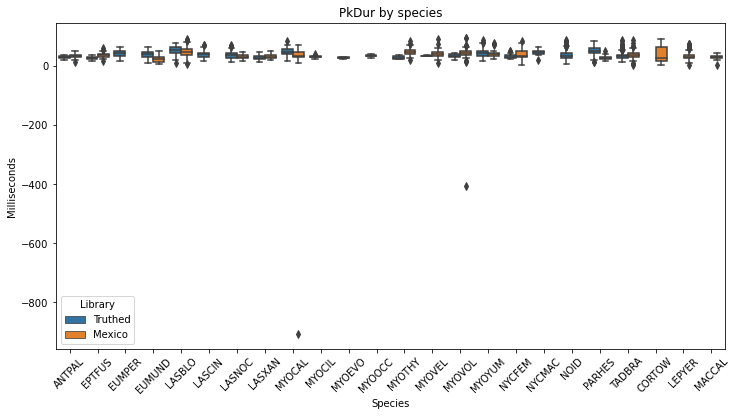

In [54]:
plt.subplots(figsize=(12,6))
sns.boxplot(df['Spp'], df['PkDur'], hue = df['Library'])
plt.xlabel('Species')
plt.ylabel('Milliseconds')
plt.title('PkDur by species')
plt.xticks(rotation=45)